# Task 3: A/B Hypothesis Testing


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.hypothesis_analysis import *

# Load Data

In [2]:
data = pd.read_csv('../data/dataset.csv', low_memory=False, index_col=False)

# Calculate risk and margin

In [20]:
data['Margin'] = data['TotalPremium'] - data['TotalClaims']

In [23]:
def print_test_results(result, risks):
    if 'error' in result:
        print(result['error'])
    else:
        print(f"Test type: {result['test_type']}")
        print(f"Statistic: {result['statistic']}")
        print(f"p-value: {result['p_value']}")
        print(result['interpretation'])
    print(f"Risks:\n{risks}\n")


# 1. Test for risk differences across provinces

# Test for Risk Differences across Provinces using Anova Test

In [7]:
import pandas as pd
from scipy import stats

# Assuming data is already loaded into a DataFrame
data = pd.read_csv('../data/dataset.csv')

# Define the functions
def calculate_risk(data, group_column, value_column):
    risk = data.groupby(group_column)[value_column].mean().reset_index()
    risk.columns = [group_column, 'Average Risk']
    return risk

def perform_statistical_test(data, group_column, value_column, test_type):
    groups = [group[value_column].values for name, group in data.groupby(group_column)]
    if test_type == 'anova':
        f_stat, p_value = stats.f_oneway(*groups)
        return f_stat, p_value
    else:
        raise ValueError("Unsupported test type. Please use 'anova'.")

def print_test_results(result, risk_data):
    f_stat, p_value = result
    print("Risk per group:")
    print(risk_data)
    print(f"\nANOVA F-statistic: {f_stat}")
    print(f"ANOVA p-value: {p_value}")
    
    if p_value < 0.05:
        print("Result: There are statistically significant risk differences between groups.")
    else:
        print("Result: No statistically significant risk differences between groups.")

# Perform the analysis
print("1. Testing for risk differences across provinces")
province_risks = calculate_risk(data, 'Province', 'TotalPremium')
result = perform_statistical_test(data, 'Province', 'TotalPremium', 'anova')
print_test_results(result, province_risks)


C:\Users\eldiy\AppData\Local\Temp\ipykernel_26952\2275739198.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/dataset.csv')


1. Testing for risk differences across provinces
Risk per group:
        Province  Average Risk
0   Eastern Cape     70.546672
1     Free State     64.373780
2        Gauteng     61.071115
3  KwaZulu-Natal     77.800695
4        Limpopo     61.899038
5     Mpumalanga     53.801205
6     North West     52.276258
7  Northern Cape     49.617253
8   Western Cape     57.416793

ANOVA F-statistic: 157.27016602047266
ANOVA p-value: 3.8358007302190926e-266
Result: There are statistically significant risk differences between groups.


# Test for risk differences across provinces using chi_square test

In [12]:
import pandas as pd
from scipy import stats

# Load your dataset
data = pd.read_csv('../data/dataset.csv')

# Function to calculate risk (placeholder - replace with your actual implementation)
def calculate_risk(data, group_column, value_column):
    # Implement your risk calculation logic here
    # This is just a placeholder return
    return data.groupby(group_column)[value_column].mean()

# Function to perform statistical tests
def perform_statistical_test(data, group_column, value_column, test_type):
    groups = [group[value_column].values for name, group in data.groupby(group_column)]
    
    if test_type == 'anova':
        f_stat, p_value = stats.f_oneway(*groups)
        return f_stat, p_value
    elif test_type == 'chi_square':
        # Create a contingency table
        contingency_table = pd.crosstab(data[group_column], data[value_column])
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        return chi2_stat, p_value
    else:
        raise ValueError("Unsupported test type. Please use 'anova' or 'chi_square'.")

# Example of binning TotalPremium into categories for Chi-Square test
data['Premium_Category'] = pd.cut(data['TotalPremium'], bins=[0, 1000, 5000, 10000], labels=['Low', 'Medium', 'High'])

# Perform the risk calculation
print("1. Testing for risk differences across provinces")
province_risks = calculate_risk(data, 'Province', 'TotalPremium')

# Choose the test type (change to 'anova' if you prefer ANOVA)
result = perform_statistical_test(data, 'Province', 'Premium_Category', 'chi_square')

# Function to print test results (placeholder - replace with your actual implementation)
def print_test_results(result, province_risks):
    print("Test Results:")
    print(result)
    print("Province Risks:")
    print(province_risks)

# Print the results
print_test_results(result, province_risks)


C:\Users\eldiy\AppData\Local\Temp\ipykernel_26952\2471596667.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/dataset.csv')


1. Testing for risk differences across provinces
Test Results:
(np.float64(3244.864266605095), np.float64(0.0))
Province Risks:
Province
Eastern Cape     70.546672
Free State       64.373780
Gauteng          61.071115
KwaZulu-Natal    77.800695
Limpopo          61.899038
Mpumalanga       53.801205
North West       52.276258
Northern Cape    49.617253
Western Cape     57.416793
Name: TotalPremium, dtype: float64


# Visualizations for Risk Difference accross province

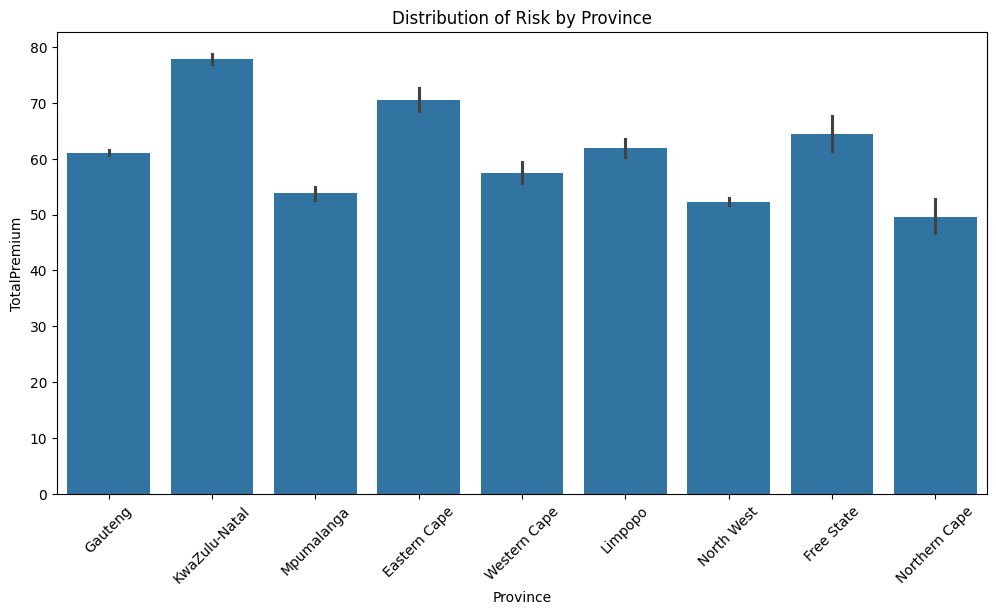

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='TotalPremium', data=data)
plt.title('Distribution of Risk by Province')
plt.xticks(rotation=45)
plt.show()

# 2. Test for risk differences between zip codes

# Test for risk differences between zipcodes using anova test

In [16]:
print("2. Testing for risk differences between zipcodes")
zipcode_risks = calculate_risk(data, 'PostalCode', 'TotalPremium')
result = perform_statistical_test(data, 'PostalCode', 'TotalPremium', 'anova')
print_test_results(result, zipcode_risks.nlargest(5))

2. Testing for risk differences between zipcodes
Test Results:
(np.float64(10.811115758352543), np.float64(0.0))
Province Risks:
PostalCode
3887    196.635975
4016    195.716263
9744    175.104079
3802    172.142169
3740    171.417242
Name: TotalPremium, dtype: float64


# Test for risk differences between zipcodes using chi_square test

In [17]:
print("2. Testing for risk differences between zipcodes")
zipcode_risks = calculate_risk(data, 'PostalCode', 'TotalPremium')
result = perform_statistical_test(data, 'PostalCode', 'TotalPremium', 'chi_square')
print_test_results(result, zipcode_risks.nlargest(5))

2. Testing for risk differences between zipcodes
Test Results:
(np.float64(224052676.14292973), np.float64(0.0))
Province Risks:
PostalCode
3887    196.635975
4016    195.716263
9744    175.104079
3802    172.142169
3740    171.417242
Name: TotalPremium, dtype: float64


# 3. Test for margin (profit) differences between zip codes

# Test for margin (profit) differences between zip codes using anova test

In [30]:
print("3. Testing for margin differences between zip codes")
zipcode_margins = calculate_margin(data, 'PostalCode')
result = perform_statistical_test(data, 'PostalCode', 'Margin', 'anova')
print_test_results(result, zipcode_margins.nlargest(5))

3. Testing for margin differences between zip codes
Test type: anova
Statistic: 0.8707474893589257
p-value: 0.9976859758015036
Fail to reject the null hypothesis (p-value: 0.9977). There is no significant difference.
Risks:
PostalCode
299     499664.815068
7405    324376.556654
152     263011.382648
400     259733.893377
316     256051.433784
dtype: float64



# 4. Test for Risk Differences Between Women and Men

# Test for risk differences between Women and Men

In [31]:
print("4. Testing for risk differences between Women and Men")
filtered_data = data[data['Gender'].isin(['Male', 'Female'])]
gender_risks = calculate_risk(filtered_data, 'Gender', 'TotalPremium')
result = perform_statistical_test(filtered_data, 'Gender', 'TotalPremium', 't_test')
print_test_results(result, gender_risks)

4. Testing for risk differences between Women and Men
Test type: t_test
Statistic: -5.118420932688848
p-value: 3.0925282750010697e-07
Reject the null hypothesis (p-value: 0.0000). There is a significant difference.
Risks:
Gender
Female    45.074841
Male      36.904566
Name: TotalPremium, dtype: float64



# Visualizations for Risk difference between Men and Women

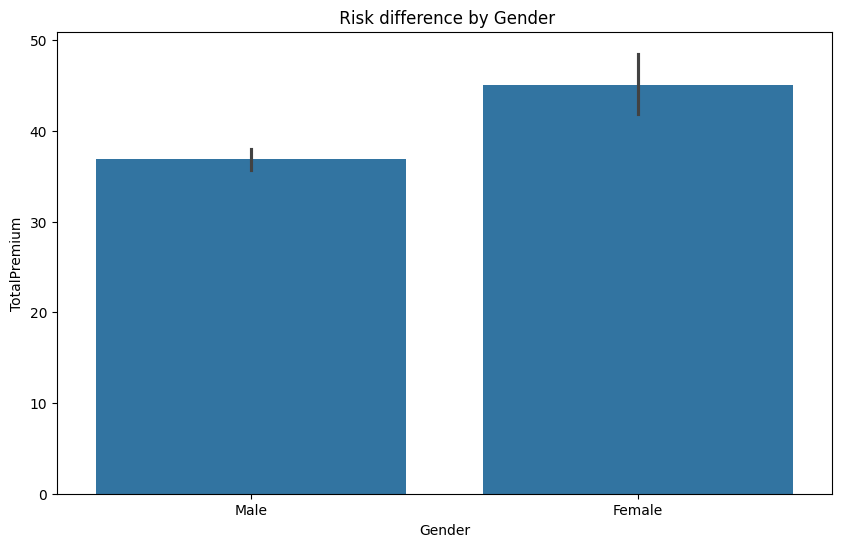

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='TotalPremium', data=filtered_data)
plt.title(' Risk difference by Gender')
plt.show()

# Analysis of Risk vs. Premium correlation

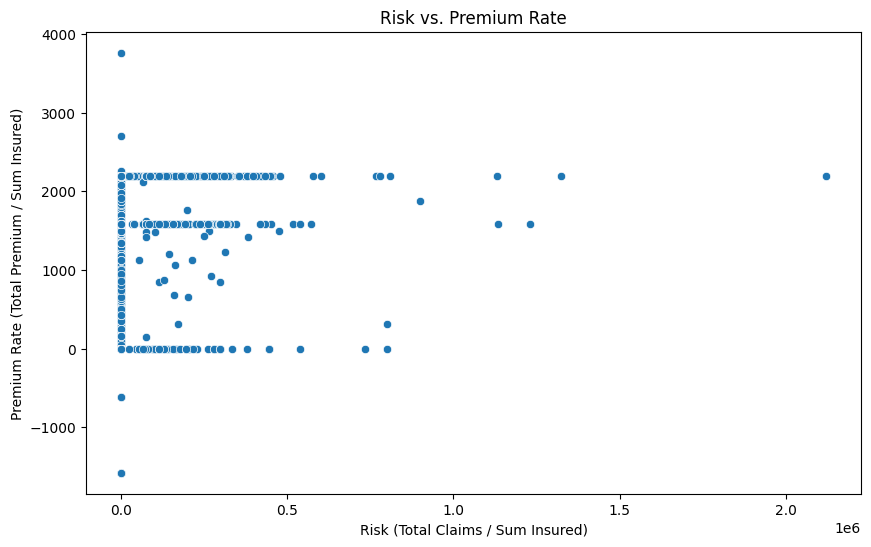

In [33]:
data['Risk'] = data['TotalClaims'] / data['SumInsured']
data['PremiumRate'] = data['TotalPremium'] / data['SumInsured']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Risk', y='PremiumRate', data=data)
plt.title('Risk vs. Premium Rate')
plt.xlabel('Risk (Total Claims / Sum Insured)')
plt.ylabel('Premium Rate (Total Premium / Sum Insured)')
plt.show()